# Exploratory Analysis

In [3]:
import warnings
warnings.filterwarnings('ignore')

import math
import datapackage
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

In [2]:
# Load all companies from S&P500
data_url = 'https://datahub.io/core/s-and-p-500-companies/datapackage.json'

package = datapackage.Package(data_url)

resources = package.resources
for resource in resources:
    if resource.tabular:
        data = pd.read_csv(resource.descriptor['path'])
data.head(3)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care


In [3]:
# Save the symbols dataset to a csv
data.to_csv(r'/home/didac/master_data_science/99_TFM/idees/priceStockAnalysis/datasets/symbols.csv', index = False)

In [4]:
# Load csv to pandas
df_symbols = pd.read_csv("datasets/symbols.csv", sep=",")

In [5]:
df_symbols.head(3)

,Symbol,Name,Sector
0,MMM,3M Company,Industrials
1,AOS,A.O. Smith Corp,Industrials
2,ABT,Abbott Laboratories,Health Care


In [6]:
df_symbols['Sector'].unique()

array(['Industrials', 'Health Care', 'Information Technology',
       'Communication Services', 'Consumer Discretionary', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Consumer Staples',
       'Energy'], dtype=object)

In [7]:
# Get all Information Technology companies
def sectorSymbol(sector):
    df_sector_symbol = df_symbols[df_symbols["Sector"] == sector]
    return df_sector_symbol

<h3>Create sectors dataframes

In [8]:
df_symbols_tech = sectorSymbol('Information Technology')
df_symbols_ind = sectorSymbol('Industrials')
df_symbols_fin = sectorSymbol('Financials')
df_symbols_health = sectorSymbol('Health Care')

<h5>Drop invalid row

In [9]:
# Drop BRK.B it give error when scraping data
idx_brk_b = df_symbols_fin[df_symbols_fin['Symbol'] == 'BRK.B'].index[0]
df_symbols_fin.drop([idx_brk_b], inplace=True)

<h4>Define period

In [10]:
from datetime import date

START = '2015-01-01'
END = date.today().strftime("%Y-%m-%d")

### Analyse sector companies

In [11]:
import pandas_datareader as web

def createSectorDataFrame(df_input):
    df_companies = pd.DataFrame()
    for symbol in df_input['Symbol']:
        df = web.DataReader(symbol, data_source='yahoo', start=START, end=END)
        df['Symbol'] = symbol
        df.reset_index(inplace=True)
        df_companies = pd.concat([df_companies, df])
    return df_companies

<h4>Create Sector dataframes

In [12]:
# Technological companies
tech_companies = createSectorDataFrame(df_symbols_tech)

In [13]:
# Industrial companies
ind_companies = createSectorDataFrame(df_symbols_ind)

In [18]:
# Financials companies
fin_companies = createSectorDataFrame(df_symbols_fin)

In [ ]:
# Health care companies
health_companies = createSectorDataFrame(df_symbols_health)

<h4>Save dataframe to csv

In [ ]:
# Save the sector companies dataset to a csv
tech_companies.to_csv(r'/home/didac/master_data_science/99_TFM/idees/priceStockAnalysis/datasets/tech_companies.csv', index = False)
ind_companies.to_csv(r'/home/didac/master_data_science/99_TFM/idees/priceStockAnalysis/datasets/ind_companies.csv', index = False)
fin_companies.to_csv(r'/home/didac/master_data_science/99_TFM/idees/priceStockAnalysis/datasets/fin_companies.csv', index = False)
health_companies.to_csv(r'/home/didac/master_data_science/99_TFM/idees/priceStockAnalysis/datasets/health_companies.csv', index = False)

<h4>Load csv to dataframes

In [4]:
# Read sector companies csv
df_tech_companies = pd.read_csv("datasets/tech_companies.csv", sep=",")
df_ind_companies = pd.read_csv("datasets/ind_companies.csv", sep=",")
df_fin_companies = pd.read_csv("datasets/fin_companies.csv", sep=",")
df_health_companies = pd.read_csv("datasets/health_companies.csv", sep=",")

<h4>Show Dataframes

In [5]:
df_tech_companies.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol
0,2015-01-02,90.089996,88.430000,89.669998,88.839996,2021300.0,79.213051,ACN
1,2015-01-05,88.320000,87.180000,88.040001,87.339996,3000000.0,77.875580,ACN
2,2015-01-06,87.769997,86.010002,87.500000,86.709999,2867000.0,77.313828,ACN


In [6]:
df_ind_companies.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol
0,2015-01-02,165.080002,162.729996,164.710007,164.059998,2116400.0,139.397049,MMM
1,2015-01-05,163.639999,160.080002,163.000000,160.360001,3692900.0,136.253281,MMM
2,2015-01-06,161.369995,157.740005,160.820007,158.649994,3532000.0,134.800354,MMM


In [7]:
df_fin_companies.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol
0,2015-01-02,30.805,30.330000,30.750000,30.540001,2846000.0,26.629417,AFL
1,2015-01-05,30.275,29.620001,30.219999,29.740000,4757000.0,25.931858,AFL
2,2015-01-06,29.775,29.395000,29.705000,29.475000,5819000.0,25.700788,AFL


In [8]:
df_health_companies.head(3)

,Date,High,Low,Open,Close,Volume,Adj Close,Symbol
0,2015-01-02,45.450001,44.639999,45.250000,44.900002,3216600.0,39.993912,ABT
1,2015-01-05,45.400002,44.630001,44.799999,44.910000,5735900.0,40.002811,ABT
2,2015-01-06,45.110001,43.930000,44.990002,44.400002,6584300.0,39.548553,ABT


<h4>Reorder dataframes

In [9]:
# Sort all the companies by date
def sortDate(df):
    df['Date'] = df['Date'].astype(np.datetime64)
    df.sort_values(by=['Date'], inplace=True)
    df.set_index('Date', inplace=True)
    return df

In [10]:
df_tech_companies_sorted = sortDate(df_tech_companies)
df_ind_companies_sorted = sortDate(df_ind_companies)
df_fin_companies_sorted = sortDate(df_fin_companies)
df_health_companies_sorted = sortDate(df_health_companies)

<h3>Analyse the growth from the different sectors companies

In [11]:
# Get the closing price of each stock at the end of each year
def growthData(df_intput):
    all_symbols = df_intput['Symbol'].unique().tolist()
    growth_data = pd.DataFrame(index=all_symbols, columns=['2015','2016','2017','2018','2019','2020'])
    for sym in all_symbols:
        sym_data = df_intput[df_intput['Symbol'] == sym]['Close']
        year_end_close_prices = []
        for year in range(2015, 2021):
            close_price = sym_data[sym_data.index.year == year]
            if close_price.size > 0:
                year_end_close_prices.append(float(sym_data[sym_data.index.year == year].tail(1)))
            else:
                year_end_close_prices.append(np.nan)
        growth_data.loc[sym] = year_end_close_prices
    return growth_data

In [12]:
# Calculate the percentage change of each stock year on year
# pct_change --> Percentage change between the current and a prior element.
def growth_pct(growthData):
    growthData_pct_change = growthData.pct_change(axis='columns')
#     growthData_pct_change.head()
    return growthData_pct_change

In [13]:
# Technological sector
tech_growth = growth_pct(growthData(df_tech_companies_sorted))
tech_growth.head(3)

,2015,2016,2017,2018,2019,2020
ACN,NaN,0.120861,0.307009,-0.078908,0.493298,0.143895
SNPS,NaN,0.290506,0.448182,-0.011732,0.652422,0.560129
STX,NaN,0.041189,0.096149,-0.077677,0.541850,-0.234454


In [14]:
# Industrial sector
ind_growth = growth_pct(growthData(df_ind_companies_sorted))
ind_growth.head(3)

,2015,2016,2017,2018,2019,2020
MMM,NaN,0.185409,0.318082,-0.190466,-0.074105,-0.069947
ITW,NaN,0.321321,0.362486,-0.240695,0.417870,0.105996
JBHT,NaN,0.323201,0.184506,-0.190816,0.255159,0.222812


In [15]:
# Finantial sector
fin_growth = growth_pct(growthData(df_fin_companies_sorted))
fin_growth.head(3)

,2015,2016,2017,2018,2019,2020
AFL,NaN,0.161937,0.261207,0.038050,0.161106,-0.302836
BLK,NaN,0.117526,0.349950,-0.235327,0.279721,0.183569
BK,NaN,0.149442,0.136767,-0.126068,0.069259,-0.253924


In [16]:
# Finantial sector
health_growth = growth_pct(growthData(df_health_companies_sorted))
health_growth.head(3)

,2015,2016,2017,2018,2019,2020
ABT,NaN,-0.144734,0.485811,0.267391,0.200885,0.281257
ZTS,NaN,0.117070,0.345787,0.187396,0.547229,0.205969
BAX,NaN,0.162254,0.457826,0.018255,0.270435,0.031691


<h4>Create a top5 companies with higher annual growth

In [25]:
def top_growth(df):
    top_dict = {}
    for year in range(2016, 2021):
        year = str(year)
        top_dict['top'] = [1,2,3,4,5]
        top_dict['sym_' + year] = tech_growth.sort_values(by=year, ascending=False)[year].head(5).index
        top_dict['growth_' + year] = round(tech_growth.sort_values(by=year, ascending=False)[year].head(5), 2).values
    df_growth = pd.DataFrame(top_dict)
    return df_growth

In [27]:
top_tech = top_growth(tech_growth)
top_tech.set_index('top')

,sym_2016,growth_2016,sym_2017,growth_2017,sym_2018,growth_2018,sym_2019,growth_2019,sym_2020,growth_2020
top,,,,,,,,,,
1,AMD,2.95,ANET,1.43,AMD,0.80,AMD,1.48,NVDA,1.15
2,NVDA,2.24,IPGP,1.17,FTNT,0.61,PAYC,1.16,PYPL,0.89
3,DXC,0.82,MU,0.88,ZBRA,0.53,LRCX,1.15,AMD,0.83
4,AMAT,0.73,PYPL,0.87,PAYC,0.52,KLAC,0.99,AAPL,0.70
5,MU,0.55,NVDA,0.81,KEYS,0.49,QRVO,0.91,NOW,0.70


In [28]:
top_ind = top_growth(ind_growth)
top_ind.set_index('top')

,sym_2016,growth_2016,sym_2017,growth_2017,sym_2018,growth_2018,sym_2019,growth_2019,sym_2020,growth_2020
top,,,,,,,,,,
1,AMD,2.95,ANET,1.43,AMD,0.80,AMD,1.48,NVDA,1.15
2,NVDA,2.24,IPGP,1.17,FTNT,0.61,PAYC,1.16,PYPL,0.89
3,DXC,0.82,MU,0.88,ZBRA,0.53,LRCX,1.15,AMD,0.83
4,AMAT,0.73,PYPL,0.87,PAYC,0.52,KLAC,0.99,AAPL,0.70
5,MU,0.55,NVDA,0.81,KEYS,0.49,QRVO,0.91,NOW,0.70


In [29]:
top_fin = top_growth(fin_growth)
top_fin.set_index('top')

,sym_2016,growth_2016,sym_2017,growth_2017,sym_2018,growth_2018,sym_2019,growth_2019,sym_2020,growth_2020
top,,,,,,,,,,
1,AMD,2.95,ANET,1.43,AMD,0.80,AMD,1.48,NVDA,1.15
2,NVDA,2.24,IPGP,1.17,FTNT,0.61,PAYC,1.16,PYPL,0.89
3,DXC,0.82,MU,0.88,ZBRA,0.53,LRCX,1.15,AMD,0.83
4,AMAT,0.73,PYPL,0.87,PAYC,0.52,KLAC,0.99,AAPL,0.70
5,MU,0.55,NVDA,0.81,KEYS,0.49,QRVO,0.91,NOW,0.70


In [31]:
top_health = top_growth(health_growth)
top_health.set_index('top')

,sym_2016,growth_2016,sym_2017,growth_2017,sym_2018,growth_2018,sym_2019,growth_2019,sym_2020,growth_2020
top,,,,,,,,,,
1,AMD,2.95,ANET,1.43,AMD,0.80,AMD,1.48,NVDA,1.15
2,NVDA,2.24,IPGP,1.17,FTNT,0.61,PAYC,1.16,PYPL,0.89
3,DXC,0.82,MU,0.88,ZBRA,0.53,LRCX,1.15,AMD,0.83
4,AMAT,0.73,PYPL,0.87,PAYC,0.52,KLAC,0.99,AAPL,0.70
5,MU,0.55,NVDA,0.81,KEYS,0.49,QRVO,0.91,NOW,0.70


<h4>Create average annual growth for all companies of the different sectors

In [32]:
# Get average groth
def getYearGrowth(df_input):
    df_avg = pd.DataFrame()
    for year in df_input.columns:
        mean = df_input[year].mean()
        df = pd.DataFrame({'year': [int(year)], 'growth': [float(mean)]})
        df_avg = pd.concat([df_avg, df])
    df_avg.set_index('year', inplace=True)
    df_avg.dropna(inplace=True)
    return df_avg

In [33]:
tech_year_growth = getYearGrowth(tech_growth)
ind_year_growth = getYearGrowth(ind_growth)
fin_year_growth = getYearGrowth(fin_growth)
health_year_growth = getYearGrowth(health_growth)

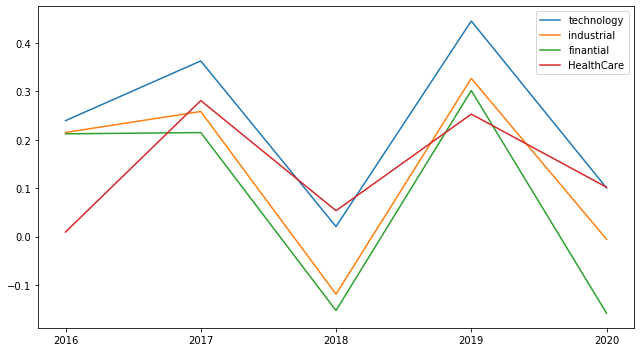

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(tech_year_growth['growth'], label='technology')
ax.plot(ind_year_growth['growth'], label='industrial')
ax.plot(fin_year_growth['growth'], label='finantial')
ax.plot(health_year_growth['growth'], label='HealthCare')
plt.xticks([2016,2017,2018,2019,2020])
plt.legend(loc = 'best')
plt.tight_layout()

<h3>Analyzing MinMax Ratios by Sector

<p>Take the company with highest and lowest growth ration per year to analyse the evolution

In [35]:
def ratioMinMax(df_input):
    df_year_ratio = pd.DataFrame()
    for year in df_input.columns:
        if df_input[df_input[year] == np.min(df_input[year])][year].to_list():
            _min = df_input[df_input[year] == np.min(df_input[year])][year][0]
            _max = df_input[df_input[year] == np.max(df_input[year])][year][0]
            df = pd.DataFrame({'year': [int(year)], 
                               'max': [float(_max)],
                               'symbol_max': [df_input[df_input[year] == np.max(df_input[year])].index[0]],
                               'min': [float(_min)],
                               'symbol_min': [df_input[df_input[year] == np.min(df_input[year])].index[0]]})
            df_year_ratio = pd.concat([df_year_ratio, df])
        else:
            None
    df_year_ratio.set_index('year')
    return df_year_ratio        

<h4>MinMax Ratios Tech Sector

In [36]:
df_tech_ratio = ratioMinMax(tech_growth)
df_tech_ratio.set_index('year', inplace=True)

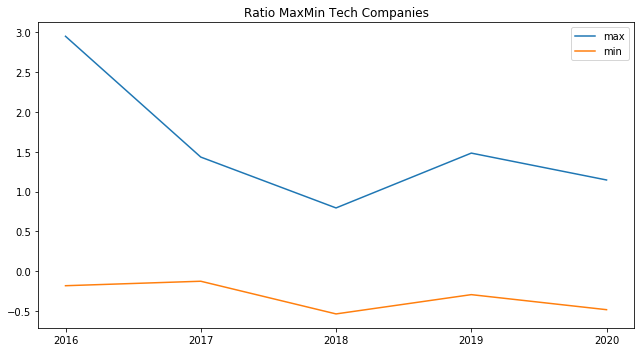

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(df_tech_ratio['max'], label='max')
ax.plot(df_tech_ratio['min'], label='min')
plt.xticks([2016,2017,2018,2019,2020])
plt.title("Ratio MaxMin Tech Companies")
plt.legend(loc = 'best')
plt.tight_layout()

<h4>MinMax Ratios Industrial Sector

In [38]:
df_ind_ratio = ratioMinMax(ind_growth)
df_ind_ratio.set_index('year', inplace=True)

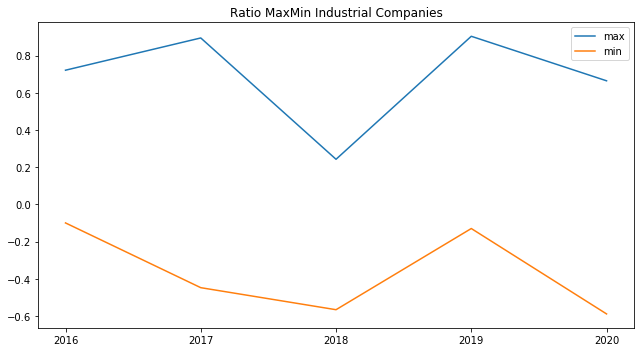

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(df_ind_ratio['max'], label='max')
ax.plot(df_ind_ratio['min'], label='min')
plt.xticks([2016,2017,2018,2019,2020])
plt.title("Ratio MaxMin Industrial Companies")
plt.legend(loc = 'best')
plt.tight_layout()

<h4>MinMax Ratios HealthCare Sector

In [40]:
df_health_ratio = ratioMinMax(health_growth)
df_health_ratio.set_index('year', inplace=True)

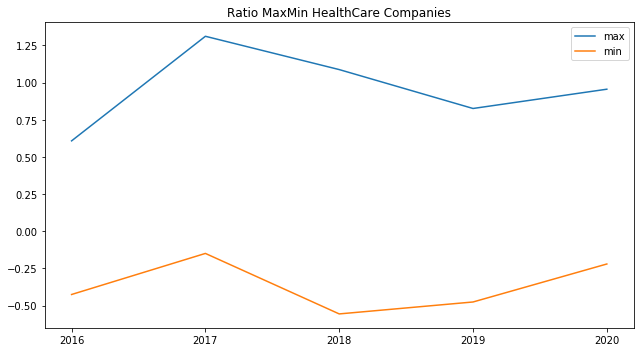

In [41]:
fig, ax = plt.subplots(1, 1, figsize=(9, 5))
ax.plot(df_health_ratio['max'], label='max')
ax.plot(df_health_ratio['min'], label='min')
plt.xticks([2016,2017,2018,2019,2020])
plt.title("Ratio MaxMin HealthCare Companies")
plt.legend(loc = 'best')
plt.tight_layout()

In [42]:
# Top performing symbols in each year with respect to their growth rate
def top_growth_old(df):
    for year in range(2016,2021):  
        year = str(year)
        print(f'=========={year}==========')
        print(' '*24)
        print(df.sort_values(by=year, ascending=False).head()[year])
        print(' '*24)

In [45]:
top_growth_old(health_growth)

==========2016==========
                        
IDXX    0.608201
ALGN    0.459833
WST     0.408668
UNH     0.360422
BIO     0.314582
Name: 2016, dtype: float64
                        
==========2017==========
                        
ALGN    1.311349
VRTX    1.034207
CNC     0.785171
ISRG    0.726383
ILMN    0.706420
Name: 2017, dtype: float64
                        
==========2018==========
                        
DXCM    1.087472
ABMD    0.734379
BSX     0.425575
HCA     0.416781
ILMN    0.372740
Name: 2018, dtype: float64
                        
==========2019==========
                        
DXCM    0.825876
BIO     0.593446
ZTS     0.547229
WST     0.533510
EW      0.523079
Name: 2019, dtype: float64
                        
==========2020==========
                        
DXCM    0.955518
ABMD    0.823671
WST     0.822125
REGN    0.637823
IDXX    0.479263
Name: 2020, dtype: float64
                        
